**Submission Dicoding Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series**

Nama : Didik Kurniawan

Username Dicoding : didik_kurniawan_slVA

Email : didik2584@gmail.com

In [3]:
!wget --no-check-certificate \
  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip \
  -O /content/Bike-Sharing-Dataset.zip

--2024-01-10 23:53:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/Bike-Sharing-Dataset.zip’

/content/Bike-Shari     [  <=>               ] 273.43K  1.01MB/s    in 0.3s    

2024-01-10 23:53:37 (1.01 MB/s) - ‘/content/Bike-Sharing-Dataset.zip’ saved [279992]



**Import library yang akan digunakan**

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

**Membaca & mengekstak file dataset**

In [5]:
from zipfile import ZipFile
import os

local_zip = '/content/Bike-Sharing-Dataset.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Menampilkan listnya**

In [6]:
os.listdir('/content')

['.config', 'Bike-Sharing-Dataset.zip', 'sample_data']

** membaca file dan menampilkan DataFram**

In [7]:
dt_hour = pd.read_csv('/tmp/hour.csv', index_col='dteday')
dt_hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


**Menampilkan 10 data teratas**

In [8]:
dt_hour.head(10)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
2011-01-01,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
2011-01-01,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
2011-01-01,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
2011-01-01,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


**Melihat 10 data terbawah**

In [9]:
dt_hour.tail(10)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2012-12-31,17370,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
2012-12-31,17371,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
2012-12-31,17372,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
2012-12-31,17373,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
2012-12-31,17374,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Melihat total data**

In [10]:
dt_hour.shape

(17379, 16)

**Mendapatkan jumlah total nilai NaN di DataFrame**

In [11]:
dt_hour.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Melihat informasi dari data**

In [12]:
dt_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3+ MB


**Menampilkan 5 data pertama**

In [13]:
dt_hour.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [15]:
mnth = dt_hour['mnth'].values
cnt = dt_hour['cnt'].values

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mnth,cnt,test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

13903 3476


In [17]:
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=80, shuffle_buffer=1000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=80, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [18]:
x = (90.0 - 1.0) * (10 / 100)
print(x)

8.9


**callback**

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [21]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=30, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/30
174/174 [==============================] - 25s 144ms/step - loss: 1152.3998 - mae: 1152.8998 - val_loss: 163.5151 - val_mae: 164.0151
Epoch 2/30
174/174 [==============================] - 24s 137ms/step - loss: 1131.8865 - mae: 1132.3867 - val_loss: 1819.0608 - val_mae: 1819.5597
Epoch 3/30
174/174 [==============================] - 26s 149ms/step - loss: 1173.4141 - mae: 1173.9141 - val_loss: 623.6566 - val_mae: 624.1567
Epoch 4/30
174/174 [==============================] - 24s 136ms/step - loss: 1134.7318 - mae: 1135.2318 - val_loss: 683.0653 - val_mae: 683.5651
Epoch 5/30
174/174 [==============================] - 26s 147ms/step - loss: 1141.6058 - mae: 1142.1061 - val_loss: 922.7838 - val_mae: 923.2836
Epoch 6/30
174/174 [==============================] - 26s 150ms/step - loss: 1163.4468 - mae: 1163.9470 - val_loss: 43.7326 - val_mae: 44.2326
Epoch 7/30
174/174 [==============================] - 24s 137ms/step - loss: 1130.7815 - mae: 1131.2814 - val_loss: 2096.7173 - va

**plot of mae**

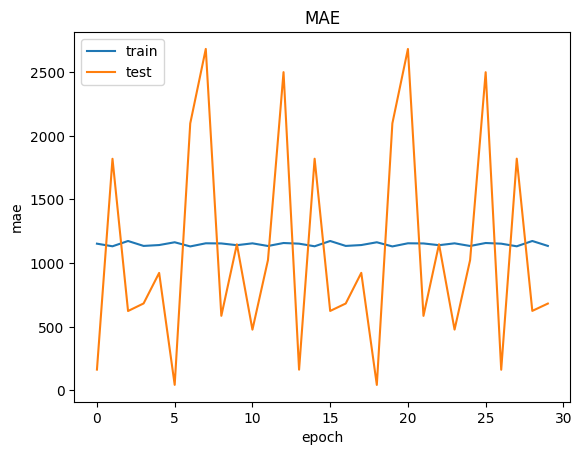

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**plot of loss**

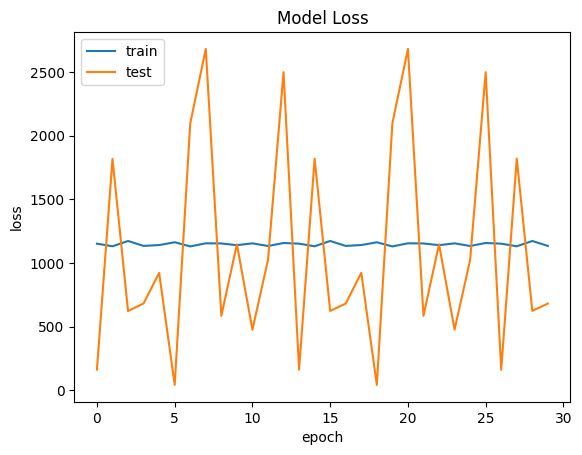

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()